# Fitbit Exploration
For an explanation on the variables, take a look at the [data dictionary created by Fitabase](https://www.fitabase.com/media/1546/fitabasedatadictionary.pdf).

## Heart Rate Processing
This notebook is concerned with looking at and processing the heart rate data provided by Fitbit.

In [1]:
import os
import sys
sys.path.append('../')

from src.features import build_features
from src.visualization import visualize
from src.reports import make_report

import pandas as pd
import numpy as np

from datetime import datetime, timedelta

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

## Importing Data
We have a function defined in 4.2.0 for importing Fitbit intra-day data

In [9]:
def import_fitbit(filename, pt_dir=f"/Volumes/HEF_Dissertation_Research/utx000/extension/data/fitbit/"):
    '''
    
    '''
    print(f"\tReading from file {filename}")
    df = pd.DataFrame()
    for pt in os.listdir(pt_dir):
        if pt[0] != ".":
            print(f"\t\tReading for participant {pt}")
            try:
                temp = pd.read_csv(f"{pt_dir}{pt}/fitbit_{filename}.csv", index_col=0, parse_dates=True)
                if filename[:4] == "intr":
                    temp = process_fitbit_intraday(temp)
                
                temp["beiwe"] = pt
                df = df.append(temp)
            except FileNotFoundError:
                print(f"\t\tFile {filename} not found for participant {pt}")
                
    return df

In [10]:
def process_fitbit_intraday(raw_df,resample_rate=1):
    '''
    
    '''
    try:
        df = raw_df.resample(f'{resample_rate}T').mean()
    except TypeError:
        print(f"\t\tDataframe is most likely empty ({len(raw_df)})")
        return raw_df
    return df

The initial function resampled the data from every hour, but that is too coarse of a resolution to see the heart rate data so I have changed it to 1-minute. I have also decided to combine the ```process_fitbit_intraday``` into the ```import_fitbit``` function so that the resample rate can be a direct input. 

In [40]:
def import_fitbit(filename, pt_dir=f"/Volumes/HEF_Dissertation_Research/utx000/extension/data/fitbit/", resample_rate=60):
    '''
    
    '''
    print(f"\tReading from file {filename}")
    df = pd.DataFrame()
    for pt in os.listdir(pt_dir):
        if pt[0] != ".":
            print(f"\t\tReading for participant {pt}")
            try:
                temp = pd.read_csv(f"{pt_dir}{pt}/fitbit_{filename}.csv", index_col=0, parse_dates=True)
                if filename[:4] == "intr":
                    try:
                        temp = temp.resample(f'{resample_rate}T').mean()
                    except TypeError:
                        print(f"\t\tDataframe is most likely empty ({len(temp)})")
                
                temp["beiwe"] = pt
                df = df.append(temp)
            except FileNotFoundError:
                print(f"\t\tFile {filename} not found for participant {pt}")
                
    return df

In [41]:
fitbit_intra = import_fitbit("intraday_records")

	Reading from file intraday_records
		Reading for participant 15tejjtw
		Reading for participant 1a9udoc5
		Reading for participant 1isvt8z8
		Dataframe is most likely empty (0)
		Reading for participant 28up4c3g
		Dataframe is most likely empty (0)
		Reading for participant 2vj84fjp
		Dataframe is most likely empty (0)
		Reading for participant 2vs5x6x9
		Dataframe is most likely empty (0)
		Reading for participant 2xtqkfz1
		Reading for participant 34483b37
		Dataframe is most likely empty (0)
		Reading for participant 3k5hntn3
		Dataframe is most likely empty (0)
		Reading for participant 3mf868h9
		Dataframe is most likely empty (0)
		Reading for participant 3muzh3ip
		Dataframe is most likely empty (0)
		Reading for participant 42epayem
		Dataframe is most likely empty (0)
		Reading for participant 4i7679py
		Reading for participant 5bg4j1pp
		Dataframe is most likely empty (0)
		Reading for participant 5fvmg226
		File intraday_records not found for participant 5fvmg226
		Reading 

In [42]:
fitbit_intra.head()

,activities_calories,activities_steps,activities_distance,activities_heart,beiwe
date,,,,,
2020-05-01 00:00:00,1.074652,11.333333,0.004536,65.960829,15tejjtw
2020-05-01 01:00:00,1.101026,5.500000,0.002175,64.045783,15tejjtw
2020-05-01 02:00:00,0.959310,NaN,NaN,62.728090,15tejjtw
2020-05-01 03:00:00,0.959310,NaN,NaN,61.418224,15tejjtw
2020-05-01 04:00:00,1.148265,8.000000,0.003169,64.459794,15tejjtw


In [43]:
print(f'Number of datapoints: {len(fitbit_intra)}')

Number of datapoints: 91637


## Individual Participant Checks
There are a few participants that wore their Fitbit 100% of the time. Here we check them against their heart rate.

### r11k6uxz
Based on the activity minutes, this participant wore their Fitbit the ENTIRE time without having to charge it? We can check that.

In [35]:
pt = 'r11k6uxz'
fb_intra_pt = fitbit_intra[fitbit_intra['beiwe'] == pt]
print(f'Number of datapoints: {len(fb_intra_pt)}')
# checking NaN values
n_nans = fb_intra_pt['activities_heart'].isna().sum()
print(f'NaN Values: {n_nans}')

Number of datapoints: 158
NaN Values: 1


In [39]:
fb_intra_pt.head()

,activities_calories,activities_steps,activities_distance,activities_heart,beiwe
date,,,,,
2020-07-12 12:30:00,1.70378,NaN,NaN,78.285714,r11k6uxz
2020-07-12 12:31:00,1.70378,NaN,NaN,86.125000,r11k6uxz
2020-07-12 12:32:00,4.98028,47.0,0.022059,91.833333,r11k6uxz
2020-07-12 12:33:00,4.19392,24.0,0.011247,87.900000,r11k6uxz
2020-07-12 12:34:00,4.19392,23.0,0.010750,88.428571,r11k6uxz


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


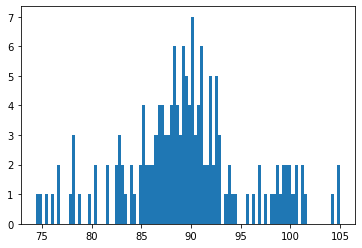

In [36]:
fig, ax = plt.subplots()
ax.hist(fb_intra_pt['activities_heart'],bins=100)

plt.show()
plt.close()

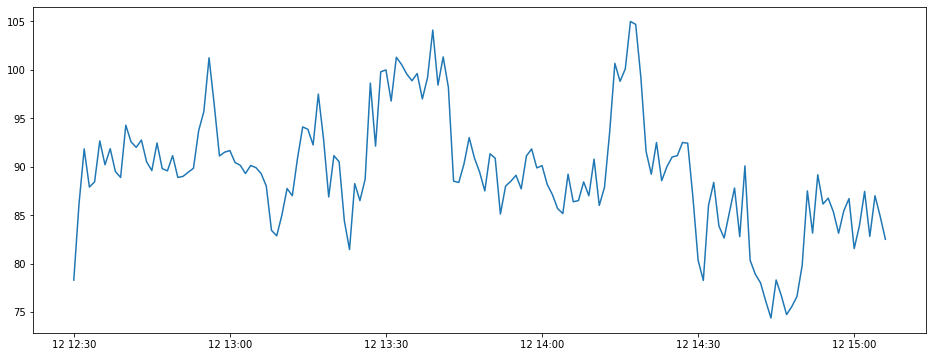

In [37]:
fix, ax = plt.subplots(figsize=(16,6))
ax.plot(fb_intra_pt.index,fb_intra_pt['activities_heart'])
plt.show()
plt.close()

Somehow this participant has nearly no heart rate data, even though the activity was complete the entire time. We need to investigate this participant's daily data to see what the issue is.

In [38]:
daily = pd.read_csv("../data/processed/bpeace2-fitbit-daily.csv",index_col=0,parse_dates=True)
daily_pt = daily[daily['beiwe'] == pt]
#daily_pt["activities_minutes"] = daily_pt[["activities_minutesSedentary","activities_minutesLightlyActive",
                                               # "activities_minutesFairlyActive","activities_minutesVeryActive"]].sum(axis=1)
daily_pt[:10]

,activities_calories,activities_caloriesBMR,activities_steps,activities_distance,activities_minutesSedentary,activities_minutesLightlyActive,activities_minutesFairlyActive,activities_minutesVeryActive,activities_activityCalories,body_bmi,body_fat,body_weight,foods_log_caloriesIn,foods_log_water,beiwe
date,,,,,,,,,,,,,,,
2020-05-01,1887.0,1887.0,0,0.0,1440,0,0,0,0.0,25.333595,0.0,185.0,0.0,0.0,r11k6uxz
2020-05-02,1887.0,1887.0,0,0.0,1440,0,0,0,0.0,25.333595,0.0,185.0,0.0,0.0,r11k6uxz
2020-05-03,1887.0,1887.0,0,0.0,1440,0,0,0,0.0,25.333595,0.0,185.0,0.0,0.0,r11k6uxz
2020-05-04,1887.0,1887.0,0,0.0,1440,0,0,0,0.0,25.333595,0.0,185.0,0.0,0.0,r11k6uxz
2020-05-05,1887.0,1887.0,0,0.0,1440,0,0,0,0.0,25.333595,0.0,185.0,0.0,0.0,r11k6uxz
2020-05-06,1887.0,1887.0,0,0.0,1440,0,0,0,0.0,25.333595,0.0,185.0,0.0,0.0,r11k6uxz
2020-05-07,1887.0,1887.0,0,0.0,1440,0,0,0,0.0,25.333595,0.0,185.0,0.0,0.0,r11k6uxz
2020-05-08,1887.0,1887.0,0,0.0,1440,0,0,0,0.0,25.333595,0.0,185.0,0.0,0.0,r11k6uxz
2020-05-09,1887.0,1887.0,0,0.0,1440,0,0,0,0.0,25.333595,0.0,185.0,0.0,0.0,r11k6uxz


### 2xtqkfz1
This participant is similar to the above except for maybe two days that were not 100%

In [25]:
pt = '2xtqkfz1'
fb_intra_pt = fitbit_intra[fitbit_intra['beiwe'] == pt]
print(f'Number of datapoints: {len(fb_intra_pt)}')
# checking NaN values
n_nans = fb_intra_pt['activities_heart'].isna().sum()
print(f'NaN Values: {n_nans}')

Number of datapoints: 82545
NaN Values: 66490


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


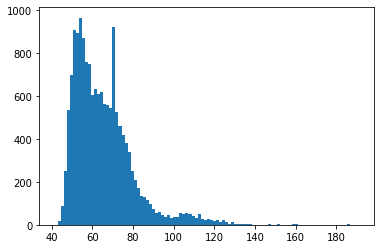

In [26]:
fig, ax = plt.subplots()
ax.hist(fb_intra_pt['activities_heart'],bins=100)

plt.show()
plt.close()

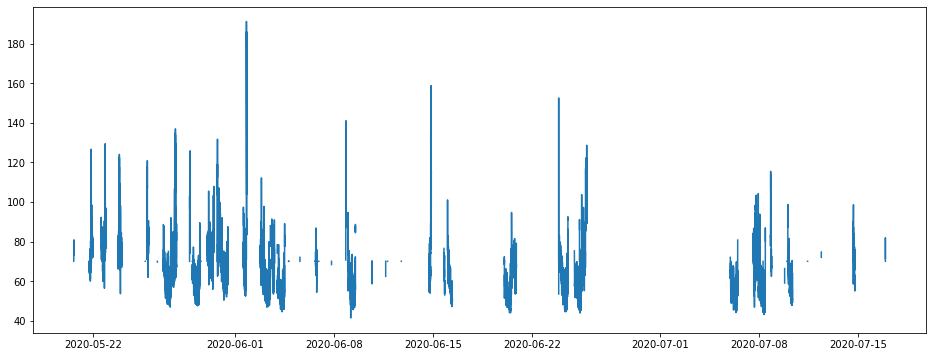

In [27]:
fix, ax = plt.subplots(figsize=(16,6))
ax.plot(fb_intra_pt.index,fb_intra_pt['activities_heart'])
plt.show()
plt.close()

There are noticeable gaps here that are not present when considering the activity minutes. In fact, the data don't even extend to the end of study period.